In [1]:
import math
import numpy as np
from PIL import Image

In [2]:
def clamp(x, min, max):
    if x < min:
        return min
    if x > max:
        return max
    return x


def mix(x, y, z):
    return x + (y - x) * z

In [3]:
luminanceWeight = np.array([0.2125, 0.7154, 0.0721])

im = Image.open("img/husky-small.jpg")

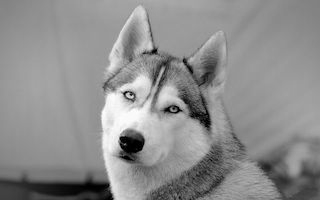

In [4]:
def Luminance(im):
    """
    Reduces an image to just its luminance (greyscale).

    http://redqueengraphics.com/2018/07/26/metal-shaders-luminance/
    """
    output = Image.new(mode=im.mode, size=im.size)
    width, height = im.size
    for i in range(height):
        for j in range(width):
            pixel = np.array(im.getpixel((j, i)))
            luminance = int(pixel.dot(luminanceWeight))
            output.putpixel((j, i), tuple(np.repeat(luminance, 3)))
    return output

Luminance(im)

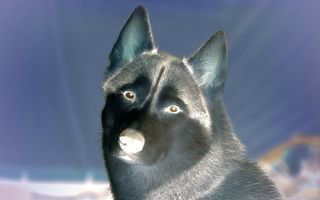

In [5]:
def ColorInversion(im):
    """
    Inverts the colors in an image.
    """
    output = Image.new(mode=im.mode, size=im.size)
    width, height = im.size
    for i in range(height):
        for j in range(width):
            pixel = im.getpixel((j, i))
            output.putpixel((j, i), tuple(map(lambda x: 255 - x, pixel)))
    return output

ColorInversion(im)

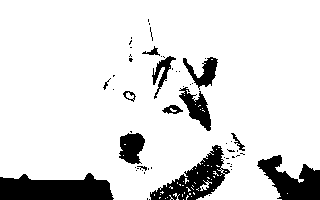

In [6]:
def LuminanceThreshold(im, threshold=125):
    """
    Pixels with a luminance above the threshold will appear white, and those below will be black.

    :param threshold: Anything above this luminance will be white, and anything below black. Ranges from 0.0 to 1.0, 
       with 0.5 as the default.
    """

    assert threshold >= 0 and threshold <= 255

    output = Image.new(mode=im.mode, size=im.size)
    width, height = im.size
    for i in range(height):
        for j in range(width):
            pixel = np.array(im.getpixel((j, i)))
            luminance = pixel.dot(luminanceWeight)
            value = 0 if luminance < threshold else 255
            output.putpixel((j, i), tuple(np.repeat(value, 3)))
    return output

LuminanceThreshold(im, threshold=100)

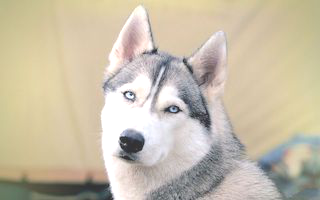

In [7]:
def BrightnessAdjustment(im, brightness=0):
    """
    Adjusts the brightness of the image.

    :param brightness: Brightness ranges from -1.0 to 1.0, with 0.0 as the normal level.
    """

    assert brightness >= -255 and brightness <= 255

    output = Image.new(mode=im.mode, size=im.size)
    width, height = im.size
    for i in range(height):
        for j in range(width):
            pixel = im.getpixel((j, i))
            output.putpixel((j, i), tuple(map(lambda x: x + brightness, pixel)))
    return output

BrightnessAdjustment(im, brightness=50)

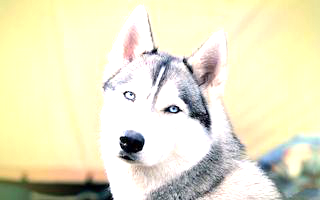

In [8]:
def ExposureAdjustment(im, exposure=0.0):
    """
    Adjusts the exposure setting for an image similar to the way you control exposure for a camera when you change the F-stop.

    :param exposure: Exposure ranges from -10.0 to 10.0, with 0.0 as the normal level.
    """

    assert exposure >= -10.0 and exposure <= 10.0

    output = Image.new(mode=im.mode, size=im.size)
    width, height = im.size
    for i in range(height):
        for j in range(width):
            pixel = im.getpixel((j, i))
            output.putpixel((j, i), tuple(map(lambda x: int(x * pow(2.0, exposure)), pixel)))
    return output

ExposureAdjustment(im, exposure=0.8)

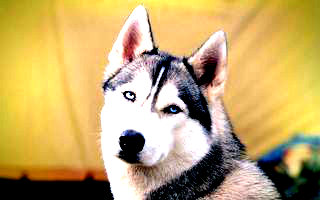

In [9]:
def ContrastAdjustment(im, contrast=1.0):
    """
    Adjusts the contrast of the image.

    http://redqueengraphics.com/2018/07/29/metal-shaders-color-adjustments/
    https://math.stackexchange.com/questions/906240/algorithms-to-increase-or-decrease-the-contrast-of-an-image

    :param contrast: Contrast ranges from 0.0 to 4.0 (max contrast), with 1.0 as the normal level.
    """

    assert contrast >= 0.0 and contrast <= 4.0

    output = Image.new(mode=im.mode, size=im.size)
    width, height = im.size
    for i in range(height):
        for j in range(width):
            pixel = im.getpixel((j, i))
            output.putpixel((j, i), tuple(map(lambda x: int((x - 127.5) * contrast + 127.5), pixel)))
    return output

ContrastAdjustment(im, contrast=3)

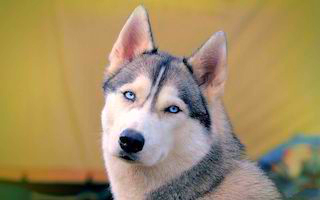

In [10]:
def SaturationAdjustment(im, saturation=1.0):
    """
    Adjusts the saturation of an image.

    Saturation is how much chrominance is present in an image.

    :param saturation: Saturation ranges from 0.0 (fully desaturated) to 2.0 (max saturation), with 1.0 as the normal level.
    """

    assert saturation >= 0.0 and saturation <= 2.0

    output = Image.new(mode=im.mode, size=im.size)
    width, height = im.size
    for i in range(height):
        for j in range(width):
            pixel = im.getpixel((j, i))
            luminance = sum(map(lambda x, y: int(x * y), pixel, luminanceWeight))
            output.putpixel((j, i), tuple(map(lambda x: int(luminance + (x - luminance) * saturation), pixel)))
    return output

SaturationAdjustment(im, saturation=2.0)

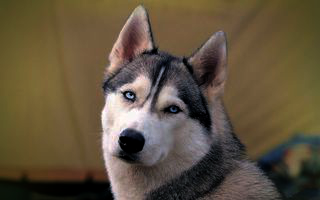

In [11]:
def GammaAdjustment(im, gamma=1.0):
    """
    Adjusts the gamma of an image.

    :param gamma: Gamma ranges from 0.0 to 3.0, with 1.0 as the normal level.
    """

    assert gamma >= 0.0 and gamma <= 3.0

    output = Image.new(mode=im.mode, size=im.size)
    width, height = im.size
    for i in range(height):
        for j in range(width):
            pixel = im.getpixel((j, i))
            output.putpixel((j, i), tuple(map(lambda x: int(pow(x / 255, gamma) * 255), pixel)))
    return output

GammaAdjustment(im, gamma=2.0)

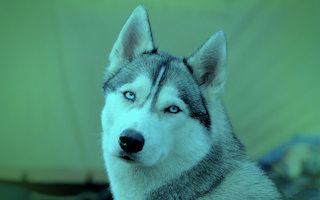

In [12]:
def RGBAdjustment(im, r=1.0, g=1.0, b=1.0):
    """
    Adjusts the individual RGB channels of an image.

    :param r: Normalized values by which each color channel is multiplied. The range is from 0.0 up, with 1.0 as the default.
    :param g: Normalized values by which each color channel is multiplied. The range is from 0.0 up, with 1.0 as the default.
    :param b: Normalized values by which each color channel is multiplied. The range is from 0.0 up, with 1.0 as the default.
    """

    assert r >= 0.0 and r <= 1.0
    assert g >= 0.0 and g <= 1.0
    assert b >= 0.0 and b <= 1.0

    output = Image.new(mode=im.mode, size=im.size)
    width, height = im.size
    for i in range(height):
        for j in range(width):
            pixel = im.getpixel((j, i))
            output.putpixel((j, i), tuple(map(lambda x, y: int(x * y), pixel, [r, g, b])))
    return output

RGBAdjustment(im, r=0.5)

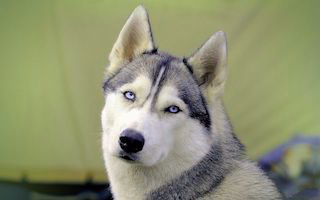

In [13]:
def HueAdjustment(im, angle=90):
    """
    Adjusts the hue of an image.

    https://en.wikipedia.org/wiki/Hue
    http://stackoverflow.com/questions/9234724/how-to-change-hue-of-a-texture-with-glsl

    :param hue: The hue angle, in degrees. 90 degrees by default.
    """

    assert angle >= 0 and angle <= 360

    # Hue Constants
    kRGBToY = np.array((0.299, 0.587, 0.114))
    kRGBToI = np.array((0.595716, -0.274453, -0.321263))
    kRGBToQ = np.array((0.211456, -0.522591, 0.31135))
    kYIQToR = np.array((1.0, 0.9563, 0.6210))
    kYIQToG = np.array((1.0, -0.2721, -0.6474))
    kYIQToB = np.array((1.0, -1.1070, 1.7046))

    output = Image.new(mode=im.mode, size=im.size)
    width, height = im.size
    for i in range(height):
        for j in range(width):
            pixel = np.array(list(map(lambda x: x / 255, im.getpixel((j, i)))))

            # Convert to YIQ
            Y = pixel.dot(kRGBToY)
            I = pixel.dot(kRGBToI)
            Q = pixel.dot(kRGBToQ)

            # Calculate the hue and chroma
            hue = math.atan2(Q, I)
            chroma = math.sqrt(I * I + Q * Q)

            # Make the user's adjustments
            hue += -angle

            # Convert back to YIQ
            Q = chroma * math.sin(hue)
            I = chroma * math.cos(hue)

            # Convert back to RGB
            YIQ = np.array([Y, I, Q])
            r = int(YIQ.dot(kYIQToR) * 255)
            g = int(YIQ.dot(kYIQToG) * 255)
            b = int(YIQ.dot(kYIQToB) * 255)
            output.putpixel((j, i), (r, g, b))
    return output

HueAdjustment(im, angle=120)

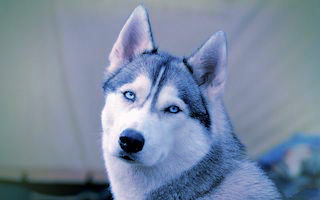

In [21]:
def WhiteBalance(im, temperature=5000, tint=0):
    """
    Allows adjustment of color temperature in terms of what an image was effectively shot in. 
    This means higher Kelvin values will warm the image, while lower values will cool it.

    https://blog.csdn.net/htjacky/article/details/78804816

    :param temperature: The temperature to adjust the image by, in ºK. A value of 4000 is very cool and 7000 very warm. 
       The default value is 5000.
       Note that the scale between 4000 and 5000 is nearly as visually significant as that between 5000 and 7000.
    :param tint: The tint to adjust the image by. A value of -200 is very green and 200 is very pink. The default value is 0.
    """

    assert temperature >= 4000 and temperature <= 7000
    assert tint >= -200 and tint <= 200

    temperature = 0.0004 * (temperature - 5000) if temperature < 5000 else 0.00006 * (temperature - 5000)
    tint = tint / 100

    warmFilter = np.array([0.93, 0.54, 0.0])
    RGBtoYIQ = np.array([0.299, 0.587, 0.114, 0.596, -0.274, -0.322, 0.212, -0.523, 0.311]).reshape(3, 3)
    YIQtoRGB = np.array([1.0, 0.956, 0.621, 1.0, -0.272, -0.647, 1.0, -1.105, 1.702]).reshape(3, 3)

    output = Image.new(mode=im.mode, size=im.size)
    width, height = im.size
    for i in range(height):
        for j in range(width):
            pixel = np.array(list(map(lambda x: x / 255, im.getpixel((j, i)))))

            yiq = pixel.dot(RGBtoYIQ.T)

            # adjusting tint
            yiq[1] = clamp(yiq[1] + tint * 0.5226 * 0.1, -0.5226, 0.5226)

            rgb = yiq.dot(YIQtoRGB.T)

            # adjusting temperature
            f = lambda x, y: (2.0 * x * y) if x < 0.5 else (1.0 - 2.0 * (1.0 - x) * (1.0 - y))
            processed = map(f, rgb, warmFilter)

            f = lambda x, y: int(mix(x, y, temperature) * 255)
            output.putpixel((j, i), tuple(map(f, rgb, processed)))
    return output

WhiteBalance(im, temperature=4000)

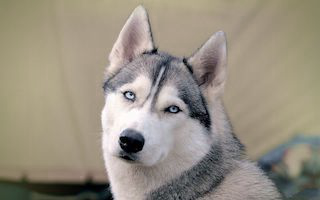

In [14]:
def Vibrance(im, vibrance=0.0):
    """
    Adjusts the saturation of an image while keeping pleasing skin tones.

    :param vibrance: The vibrance adjustment to apply, using 0.0 as the default, and a suggested min/max of around -1.2 and 1.2, 
       respectively.
    """

    assert vibrance >= -1.2 and vibrance <= 1.2

    output = Image.new(mode=im.mode, size=im.size)
    width, height = im.size
    for i in range(height):
        for j in range(width):
            pixel = list(map(lambda x: x / 255, im.getpixel((j, i))))
            average = sum(pixel) / 3
            mx = max(pixel)
            amt = (mx - average) * (-vibrance * 3.0)
            output.putpixel((j, i), tuple(map(lambda x: int((x + (mx - x) * amt) * 255), pixel)))
    return output

Vibrance(im, vibrance=-1.2)

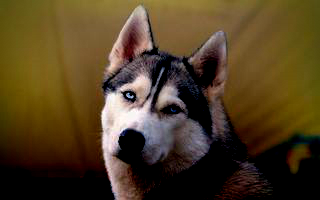

In [15]:
def Haze(im, distance=0.2, slope=0.0):
    """
    The haze filter can be used to add or remove haze (similar to a UV filter).

    :param distance: Strength of the color applied. Default 0.2. Values between -0.3 and 0.3 are best.
    :param slope: Amount of color change. Default 0. Values between -0.3 and 0.3 are best.
    """

    output = Image.new(mode=im.mode, size=im.size)
    width, height = im.size
    for i in range(height):
        for j in range(width):
            pixel = np.array(list(map(lambda x: x / 255, im.getpixel((j, i)))))
            d = i / im.height * slope + distance
            output.putpixel((j, i), tuple(map(lambda x: int((x - d * 1.0) / (1.0 - d) * 255), pixel)))
    return output

Haze(im, distance=0.3, slope=0.3)

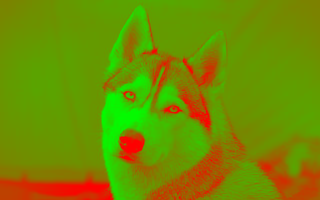

In [16]:
def FalseColor(im, c1=(0.0, 0.0, 0.5), c2=(1.0, 0.0, 0.0)):
    """
    Maps luminance to a color ramp of two colors.

    :param c1: The first color to use for the color ramp. The defaults are (0.0, 0.0, 0.5).
    :param c2: The second color to use for the color ramp. The defaults are (1.0, 0.0, 0.0).
    """

    output = Image.new(mode=im.mode, size=im.size)
    width, height = im.size
    for i in range(height):
        for j in range(width):
            pixel = np.array(list(map(lambda x: x / 255, im.getpixel((j, i)))))
            luminance = pixel.dot(luminanceWeight)
            output.putpixel((j, i), tuple(map(lambda x, y: int(mix(x, y, luminance) * 255), c1, c2)))
    return output

FalseColor(im, c1=(1.0, 0.0, 0.0), c2=(0.0, 1.0, 0.0))

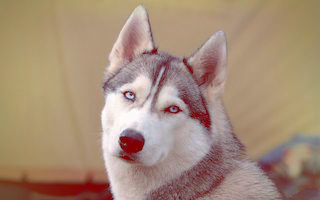

In [17]:
def HighlightAndShadowTint(im, shadowTintIntensity=0.0, highlightTintIntensity=0.0, shadowTintColor=(1.0, 0.0, 0.0), highlightTintColor=(0.0, 0.0, 1.0)):
    """
    Allows you to tint the shadows and highlights of an image independently using a color and intensity.

    :param shadowTintIntensity: Shadow tint intensity, from 0.0 to 1.0. Default: 0.0
    :param highlightTintIntensity: Highlight tint intensity, from 0.0 to 1.0, with 0.0 as the default.
    :param shadowTintColor: Shadow tint RGB color (GPUVector4). Default: {1.0f, 0.0f, 0.0f, 1.0f} (red).
    :param highlightTintColor: Highlight tint RGB color (GPUVector4). Default: {0.0f, 0.0f, 1.0f, 1.0f} (blue).
    """

    output = Image.new(mode=im.mode, size=im.size)
    width, height = im.size
    for i in range(height):
        for j in range(width):
            pixel = np.array(list(map(lambda x: x / 255, im.getpixel((j, i)))))
            luminance = pixel.dot(luminanceWeight)

            shadowResult = mix(pixel, np.array(list(map(max, pixel, mix(np.array(shadowTintColor), pixel, luminance)))), shadowTintIntensity)
            highlightResult = mix(pixel, np.array(list(map(min, shadowResult, mix(shadowResult, np.array(highlightTintColor), luminance)))), highlightTintIntensity)

            output.putpixel((j, i), tuple(map(lambda x: int(x * 255), mix(shadowResult, highlightResult, luminance))))
    return output

HighlightAndShadowTint(im, shadowTintIntensity=0.5)

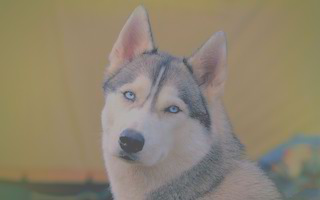

In [18]:
def LuminanceRangeReduction(im, factor=0.6):
    output = Image.new(mode=im.mode, size=im.size)
    width, height = im.size
    for i in range(height):
        for j in range(width):
            pixel = np.array(list(map(lambda x: x / 255, im.getpixel((j, i)))))
            luminance = pixel.dot(luminanceWeight)
            luminanceRatio = (0.5 - luminance) * factor
            output.putpixel((j, i), tuple(map(lambda x: int((x + luminanceRatio) * 255), pixel)))
    return output

LuminanceRangeReduction(im)

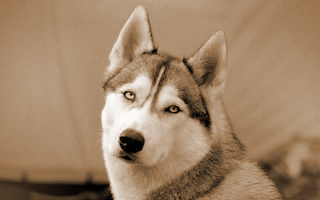

In [19]:
def MonochromeFilter(im, intensity=1.0, color=(0.6, 0.45, 0.3)):
    """
    Converts the image to a single-color version, based on the luminance of each pixel.

    :param intensity: The degree to which the specific color replaces the normal image color (0.0 - 1.0, with 1.0 as the default).
    :param color: The color to use as the basis for the effect, with (0.6, 0.45, 0.3) as the default.
    """

    assert intensity >= 0.0 and intensity <= 1.0

    output = Image.new(mode=im.mode, size=im.size)
    width, height = im.size
    for i in range(height):
        for j in range(width):
            pixel = np.array(list(map(lambda x: x / 255, im.getpixel((j, i)))))
            luminance = pixel.dot(luminanceWeight)

            # overlay
            f = lambda x: (2.0 * luminance * x) if luminance < 0.5 else (1.0 - 2.0 * (1.0 - luminance) * (1.0 - x))
            outputColor = np.array(list(map(f, color)))

            f = lambda x: int(x * 255)
            output.putpixel((j, i), tuple(map(f, mix(pixel, outputColor, intensity))))
    return output

MonochromeFilter(im)

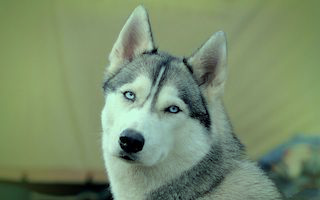

In [20]:
def ColorMatrixFilter(im, intensity=1.0, matrix=[1.0, 0.0, 0.0,
                                                 0.0, 1.0, 0.0,
                                                 0.0, 0.0, 1.0]):
    """
    Transforms the colors of an image by applying a matrix to them.

    :param intensity: The degree to which the new transformed color replaces the original color for each pixel.
    :param matrix: A 3x3 matrix used to transform each color in an image.
    """

    output = Image.new(mode=im.mode, size=im.size)
    width, height = im.size
    for i in range(height):
        for j in range(width):
            pixel = np.array(im.getpixel((j, i)))

            r = pixel.dot(np.array(matrix[0:3]))
            g = pixel.dot(np.array(matrix[3:6]))
            b = pixel.dot(np.array(matrix[6:9]))

            f = lambda x, y: int(intensity * x + (1 - intensity) * y)
            output.putpixel((j, i), tuple(map(f, (r, g, b), pixel)))
    return output


def ColorMatrixFilter2(im, matrix=[1.0, 0.0, 0.0, 0.0,
                                   0.0, 1.0, 0.0, 0.0,
                                   0.0, 0.0, 1.0, 0.0], bias=[0.0, 0.0, 0.0]):
    """
    Transforms the colors of an image by applying a matrix to them.

    :param matrix: A 3x3 matrix used to transform each color in an image.
    :param bias: 
    """

    output = Image.new(mode=im.mode, size=im.size)
    width, height = im.size
    for i in range(height):
        for j in range(width):
            pixel = np.array(im.getpixel((j, i)))

            r = int(pixel.dot(np.array(matrix[0:3])) + bias[0])
            g = int(pixel.dot(np.array(matrix[3:6])) + bias[1])
            b = int(pixel.dot(np.array(matrix[6:9])) + bias[2])
            output.putpixel((j, i), (r, g, b))
    return output

ColorMatrixFilter2(im, matrix=[0.8, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.9])

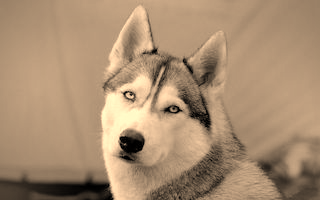

In [21]:
def SepiaToneFilter(im):
    '''
    Simple sepia tone filter.
    '''

    return ColorMatrixFilter(im, matrix=[0.3588, 0.7044, 0.1368,
                                         0.2990, 0.5870, 0.1140,
                                         0.2392, 0.4696, 0.0912])

SepiaToneFilter(im)